# Recitation 3: diving into randomness

* 2D Monte Carlo integration
* Three ways to sample from Homogeneous Poisson processes

# 2D Monte Carlo estimation of integrals

Estimate the integral

$$\int_0^{1/3}\int_{x/2}^{1+x/2} f(x, y)\,dy\,dx$$

where

$$f(x,y)=x^2+y$$

using the substitution

$$x=a/3,\qquad y=a/6+b.$$

When $x=0$, $a=0$, when $x=1/3$, $a=1$.



$$
\int_0^1\int_0^1 ((a/3)^2+a/6+b) |J_M(a,b)| \,db\,da
$$

Where $J_M$ is the Jacobian of the coordinate transform.

\begin{align*}
J_M&=\begin{pmatrix}
\frac{dx}{da} & \frac{dx}{db} \\
\frac{dy}{da} & \frac{dy}{db}
\end{pmatrix} \\
&=\begin{pmatrix}
1/3 & 0 \\
1/6 & 1
\end{pmatrix}
\end{align*}

$$
\left|\begin{pmatrix}
1/3 & 0 \\
1/6 & 1
\end{pmatrix}\right|=1/3
$$


$$\int_0^{1/3}\int_{x/2}^{1+x/2} f(x, y)\,dy\,dx
=
\int_0^1\int_0^1 ((a/3)^2+a/6+b) 1/3 \,db\,da
$$

In [1]:
import numpy as np

In [2]:
a = np.random.rand(100_000)
b = np.random.rand(100_000)

In [3]:
np.mean(((a/3)**2+a/6+b)/3)

0.20684494229090986

In [4]:
import matplotlib.pyplot as plt

# Generating homogeneous Poisson processes

## Using "property 1" ($X_i\sim^{iid}\mbox{Exp}(\lambda)$)

In [5]:
t = 0
T = 15

lmbda = 3

arrivals = []

while t < T:
    inter_arrival = np.random.exponential(1/lmbda)
    t += inter_arrival
    arrivals.append(t)

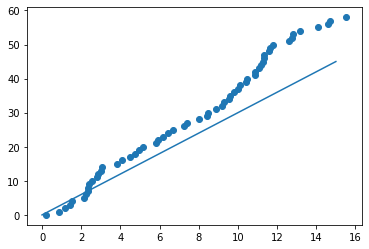

In [6]:
plt.scatter(arrivals, np.arange(len(arrivals)))
plt.plot([0,T], [0,T*lmbda])

## Using "property 3" ($N_T\sim\mbox{Pois}(\lambda T)$)

In [7]:
t = 0
T = 15

lmbda = 3

arrivals = []

number_of_arrivals = np.random.poisson(lmbda * T)

unordered_arrival_times = np.random.uniform(0, T, size=number_of_arrivals)

arrivals = sorted(unordered_arrival_times)

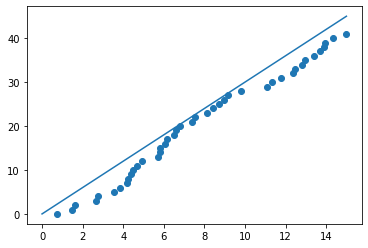

In [8]:
plt.scatter(arrivals, np.arange(len(arrivals)))
plt.plot([0,T], [0,T*lmbda])

# Generating inhomogeneous Poisson processes

## Thinning w.p. $p(t)$

In [9]:
def intensity(t):
    return t**2*(12-t)/10

In [10]:
Lmbda = 30

In [11]:
T = 12

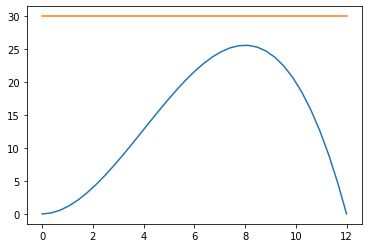

In [12]:
t = np.linspace(0, T, 35)
plt.plot(t, intensity(t))
plt.plot(t, Lmbda+0*t)

In [13]:
T * np.mean(intensity(t))

167.7176470588235

In [14]:
len(arrivals)

42

In [15]:
t = 0

arrivals = []

while t < T:
    t += np.random.exponential(1/Lmbda)
    
    # thin with probability intensity(t)/Lmbda
    if np.random.uniform() < intensity(t) / Lmbda:
        arrivals.append(t)

(array([ 4.,  6., 11.,  8., 24., 13., 22., 25., 20., 15., 12.,  9.]),
 array([ 1.29735586,  2.18034258,  3.06332931,  3.94631603,  4.82930275,
         5.71228948,  6.5952762 ,  7.47826292,  8.36124965,  9.24423637,
        10.12722309, 11.01020982, 11.89319654]),
 <BarContainer object of 12 artists>)

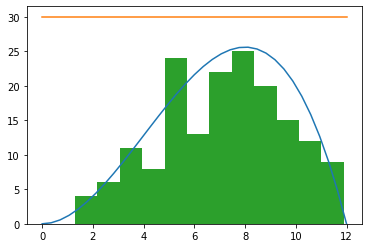

In [16]:
t = np.linspace(0, T, 35)
plt.plot(t, intensity(t))
plt.plot(t, Lmbda+0*t)
plt.hist(arrivals, bins=12)

## Inhomogenous sampling #2

In [17]:
# estimate of integral
mean_emp = T * np.mean(intensity(t))

In [18]:
mean_emp

167.7176470588235

In [19]:
number_of_arrivals = np.random.poisson(mean_emp)

In [20]:
number_of_arrivals

181

In [21]:
unordered_arrival_times = np.random.uniform(0, T, size=number_of_arrivals)

arrivals = sorted(unordered_arrival_times)